# **Final Project**
By: Andreina Arias



# Introduction


In 2020 New York City (NYC) had experienced a large death pattern due to covid-19, but was it the leading cause of death? The data set I obtained from the NYC data website, list the leading causes of death in NYC since 2007. The variables used from the data set are Cause of Death (categories such as heart disease, cancer, covid-19, respiratory diseases, and more), death rate (the measures of mortality rate (per 100,000 population)), death count, and age adjusted data (looks at the difference within the death rate eliminating the difference in age). The relationship between death rate, age adjusted death rate, and death count will be used analyzed.  


Data resource: https://data.cityofnewyork.us/Health/New-York-City-Leading-Causes-of-Death/jb7j-dtam/about_data

Raw data: https://raw.githubusercontent.com/Andreina-A/Project2_Data607/refs/heads/main/New_York_City_Leading_Causes_of_Death_20241013

In [179]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
Death_Causes_DF=pd.read_csv('https://raw.githubusercontent.com/Andreina-A/Project2_Data607/refs/heads/main/New_York_City_Leading_Causes_of_Death_20241013.csv', na_values=['NA', 'n/a', ''])#Imported CSV data and create a data frame
Death_Causes_DF.head(10)#Shows the first 10 columns

,Year,Leading Cause,Sex,Race Ethnicity,Deaths,Death Rate,Age Adjusted Death Rate
0,2011,"Nephritis, Nephrotic Syndrome and Nephrisis (N...",F,Black Non-Hispanic,83,7.9,6.9
1,2009,Human Immunodeficiency Virus Disease (HIV: B20...,F,Hispanic,96,8,8.1
2,2009,Chronic Lower Respiratory Diseases (J40-J47),F,Hispanic,155,12.9,16
3,2008,"Diseases of Heart (I00-I09, I11, I13, I20-I51)",F,Hispanic,1445,122.3,160.7
4,2009,Alzheimer's Disease (G30),F,Asian and Pacific Islander,14,2.5,3.6
5,2008,"Accidents Except Drug Posioning (V01-X39, X43,...",F,Asian and Pacific Islander,36,6.8,8.5
6,2012,"Accidents Except Drug Posioning (V01-X39, X43,...",M,White Non-Hispanic,286,21.4,18.8
7,2008,"Assault (Homicide: Y87.1, X85-Y09)",M,Not Stated/Unknown,8,.,.
8,2009,Chronic Lower Respiratory Diseases (J40-J47),M,White Non-Hispanic,371,27.6,23.3
9,2013,"Diseases of Heart (I00-I09, I11, I13, I20-I51)",F,Not Stated/Unknown,106,.,.


In [ ]:
missing_values = Death_Causes_DF.isnull().sum()#Counts missing values
print("Missing Values:\n", missing_values)

Missing Values:
 Year                         0
Leading Cause                0
Sex                          0
Race Ethnicity               0
Deaths                       0
Death Rate                 343
Age Adjusted Death Rate    343
dtype: int64


In [ ]:
info = Death_Causes_DF.info()#Summary of the dataframe
print(info)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2102 entries, 0 to 2101
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Year                     2102 non-null   int64 
 1   Leading Cause            2102 non-null   object
 2   Sex                      2102 non-null   object
 3   Race Ethnicity           2102 non-null   object
 4   Deaths                   2102 non-null   object
 5   Death Rate               1759 non-null   object
 6   Age Adjusted Death Rate  1759 non-null   object
dtypes: int64(1), object(6)
memory usage: 115.1+ KB
None


# Data Wrangling


In [ ]:
Death_Causes_DF.rename(columns={'Death Rate':'Death_rate','Leading Cause':'Causes','Age Adjusted Death Rate':'AADR'}, inplace=True)#renamed columns
Death_Causes_DF.head()

,Year,Causes,Sex,Race Ethnicity,Deaths,Death_rate,AADR
0,2011,"Nephritis, Nephrotic Syndrome and Nephrisis (N...",F,Black Non-Hispanic,83,7.9,6.9
1,2009,Human Immunodeficiency Virus Disease (HIV: B20...,F,Hispanic,96,8,8.1
2,2009,Chronic Lower Respiratory Diseases (J40-J47),F,Hispanic,155,12.9,16
3,2008,"Diseases of Heart (I00-I09, I11, I13, I20-I51)",F,Hispanic,1445,122.3,160.7
4,2009,Alzheimer's Disease (G30),F,Asian and Pacific Islander,14,2.5,3.6


In [ ]:
Death_Causes_DF['Causes'] = Death_Causes_DF['Causes'].replace({"Diseases of Heart (I00-I09, I11, I13, I20-I51)":"Ischaemic heart disease", "Alzheimer's Disease (G30)":"Alzheimer disease", "Cerebrovascular Disease (Stroke: I60-I69)":"Stroke", "Chronic Lower Respiratory Diseases (J40-J47)":"Chronic obstructive pulmonary disease","Malignant Neoplasms (Cancer: C00-C97)":"Cancer",	"Accidents Except Drug Posioning (V01-X39, X43, X45-X59, Y85-Y86)":"Accident", "Intentional Self-Harm (Suicide: X60-X84, Y87.0)":"Self-harm", "Mental and Behavioral Disorders due to Accidental Poisoning and Other Psychoactive Substance Use (F11-F16, F18-F19, X40-X42, X44)":"Mental and behavioral Health", "Intentional Self-Harm (Suicide: U03, X60-X84, Y87.0)" : "Self-harm"}) #renamed a few death causes label as their names were too long.

In [ ]:
Death_Causes_DF.applymap(lambda x: isinstance(x, (int, float))).all()#Checked if all data in each column was numeric

<ipython-input-152-00f27c583afb>:1: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  Death_Causes_DF.applymap(lambda x: isinstance(x, (int, float))).all()#Checked if all data in each column was numeric


,0
Year,True
Causes,False
Sex,False
Race Ethnicity,False
Deaths,False
Death_rate,False
AADR,False


In [ ]:
Death_Causes_DF[['Deaths', 'Death_rate', 'AADR']] = Death_Causes_DF[['Deaths', 'Death_rate', 'AADR']].replace('.', pd.NA).apply(pd.to_numeric, errors='coerce')#replace missing values that are '.' into NAN and then applies the numeric function to a group of columns

In [ ]:
Death_Causes_DF=Death_Causes_DF.dropna()#Dropped missing values, to avoid erroneous values I rather drop the NA values

In [ ]:
Death_Causes_DF.drop(['Sex', 'Race Ethnicity'],axis=1, inplace=True)#dropped the sex and age-adjusted column
Death_Causes_DF.head(10)

,Year,Causes,Deaths,Death_rate,AADR
0,2011,"Nephritis, Nephrotic Syndrome and Nephrisis (N...",83.0,7.9,6.9
1,2009,Human Immunodeficiency Virus Disease (HIV: B20...,96.0,8.0,8.1
2,2009,Chronic obstructive pulmonary disease,155.0,12.9,16.0
3,2008,Ischaemic heart disease,1445.0,122.3,160.7
4,2009,Alzheimer disease,14.0,2.5,3.6
5,2008,Accident,36.0,6.8,8.5
6,2012,Accident,286.0,21.4,18.8
8,2009,Chronic obstructive pulmonary disease,371.0,27.6,23.3
10,2014,Accident,42.0,6.7,6.9
12,2013,Alzheimer disease,120.0,9.6,11.0


In [ ]:
Data_filtered = Death_Causes_DF[Death_Causes_DF['Year']==2020]#filtered data to only show leading dieases in 2020
print("\nFiltered DataFrame:\n", Data_filtered)
Data_filtered.head(10)


Filtered DataFrame:
       Year                                   Causes  Deaths  Death_rate   AADR
1831  2020                                 Covid-19  4104.0       334.1  399.5
1832  2020                  Ischaemic heart disease  1968.0       160.2  204.7
1833  2020                                   Cancer  1089.0        88.7  106.7
1834  2020             Mental and behavioral Health   560.0        45.6   44.5
1835  2020              Diabetes Mellitus (E10-E14)   278.0        22.6   27.5
...    ...                                      ...     ...         ...    ...
1936  2020  Influenza (Flu) and Pneumonia (J09-J18)   254.0        24.7   17.9
1937  2020    Chronic obstructive pulmonary disease   253.0        24.6   18.3
1938  2020             Mental and behavioral Health   163.0        15.8   14.0
1939  2020                        Alzheimer disease   146.0        14.2    9.4
1940  2020                         All Other Causes  2059.0       200.1  154.8

[88 rows x 5 columns]


,Year,Causes,Deaths,Death_rate,AADR
1831,2020,Covid-19,4104.0,334.1,399.5
1832,2020,Ischaemic heart disease,1968.0,160.2,204.7
1833,2020,Cancer,1089.0,88.7,106.7
1834,2020,Mental and behavioral Health,560.0,45.6,44.5
1835,2020,Diabetes Mellitus (E10-E14),278.0,22.6,27.5
1836,2020,Influenza (Flu) and Pneumonia (J09-J18),276.0,22.5,29.3
1837,2020,Stroke,215.0,17.5,22.2
1838,2020,"Accidents Except Drug Poisoning (V01-X39, X43,...",201.0,16.4,17.7
1839,2020,"Chronic Liver Disease and Cirrhosis (K70, K73-...",199.0,16.2,16.7
1840,2020,Chronic obstructive pulmonary disease,173.0,14.1,17.9


<ipython-input-180-2be1ed6cd4ec>:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Deaths', y='Causes', data=Data_filtered, palette='viridis', ci=None)#removed confidence interval
<ipython-input-180-2be1ed6cd4ec>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Deaths', y='Causes', data=Data_filtered, palette='viridis', ci=None)#removed confidence interval


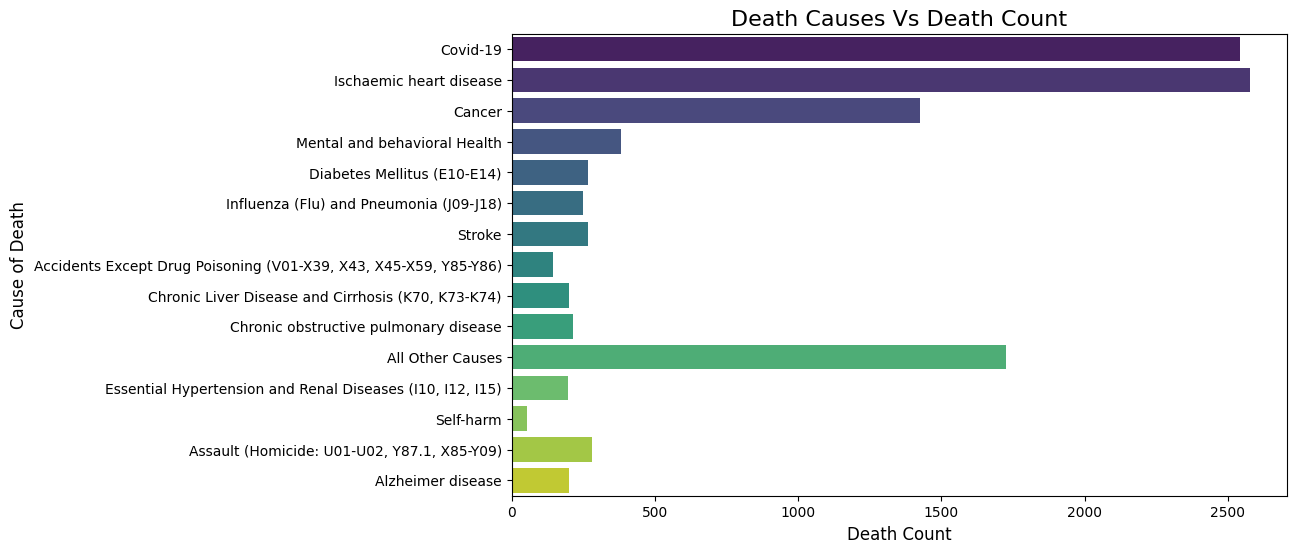

In [180]:
#Seaborn plot of Causes of death vs death count
plt.figure(figsize=(10,6))
sns.barplot(x='Deaths', y='Causes', data=Data_filtered, palette='viridis', ci=None)#removed confidence interval

# Adding labels and title
plt.title('Death Causes Vs Death Count', fontsize=16)
plt.xlabel('Death Count', fontsize=12)
plt.ylabel('Cause of Death', fontsize=12)

# Show the plot
plt.show()

<ipython-input-117-e45f1bc7f31c>:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Death_rate', y='Causes', data=Data_filtered, palette='viridis', ci=None) #removed confidence interval
<ipython-input-117-e45f1bc7f31c>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Death_rate', y='Causes', data=Data_filtered, palette='viridis', ci=None) #removed confidence interval


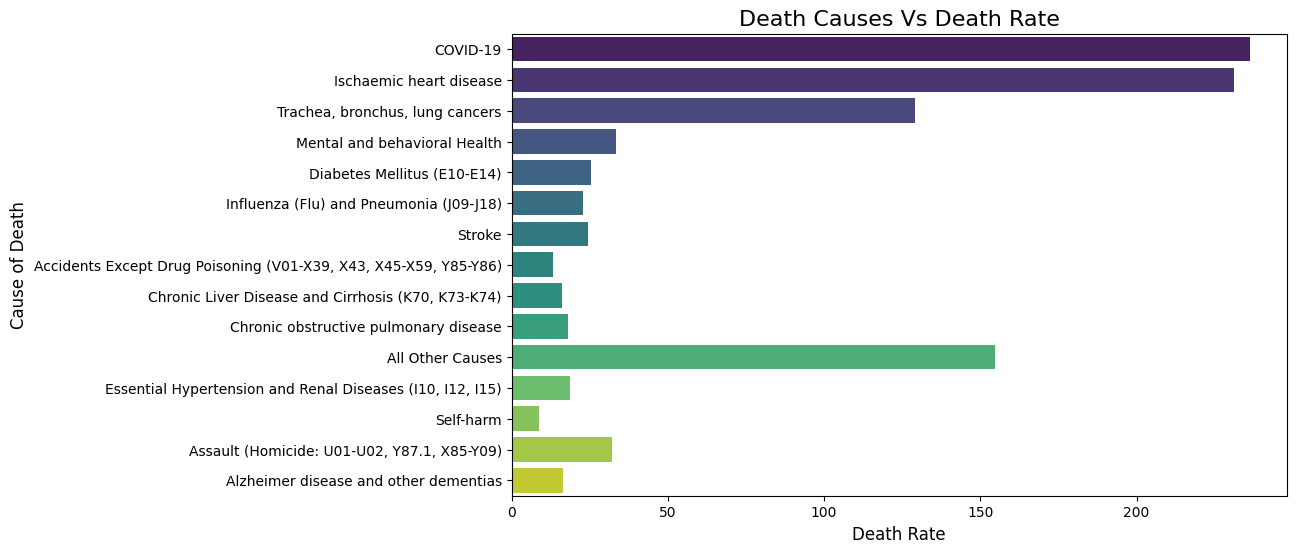

In [ ]:
#Seaborn plot of Causes of death vs death rate
plt.figure(figsize=(10,6))
sns.barplot(x='Death_rate', y='Causes', data=Data_filtered, palette='viridis', ci=None) #removed confidence interval

# Adding labels and title
plt.title('Death Causes Vs Death Rate', fontsize=16)
plt.xlabel('Death Rate', fontsize=12)
plt.ylabel('Cause of Death', fontsize=12)

# Show the plot
plt.show()

<ipython-input-158-9727cc215913>:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='AADR', y='Causes', data=Data_filtered, palette='viridis', ci=None) #removed confidence interval
<ipython-input-158-9727cc215913>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='AADR', y='Causes', data=Data_filtered, palette='viridis', ci=None) #removed confidence interval


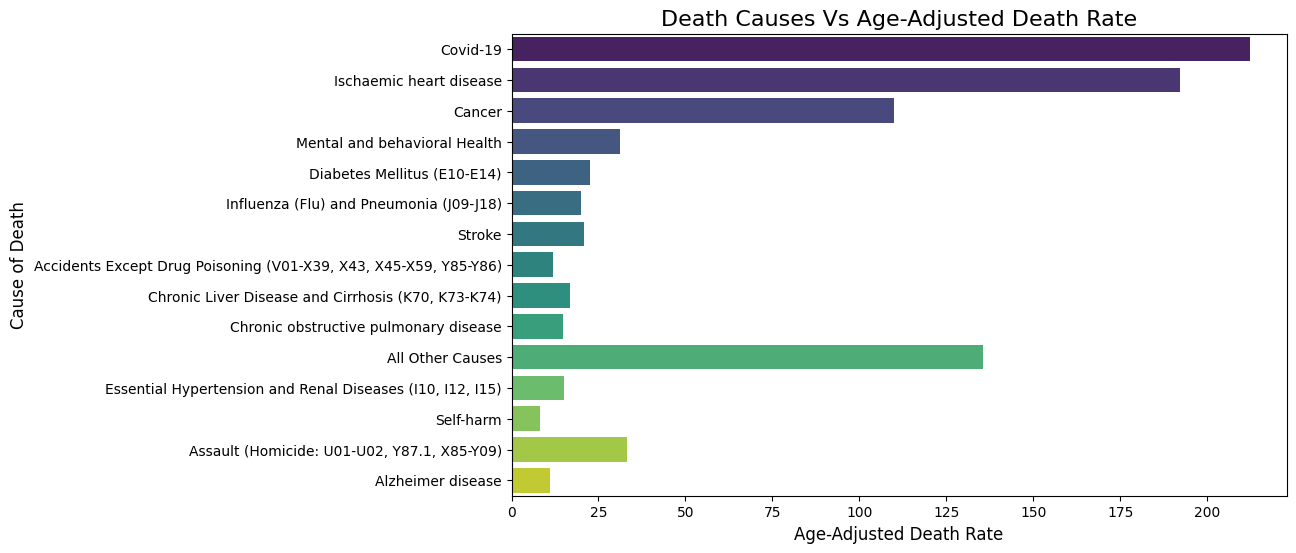

In [ ]:
#Seaborn plot of Causes of death vs Age adjusted death rate
plt.figure(figsize=(10,6))
sns.barplot(x='AADR', y='Causes', data=Data_filtered, palette='viridis', ci=None) #removed confidence interval

# Adding labels and title
plt.title('Death Causes Vs Age-Adjusted Death Rate', fontsize=16)
plt.xlabel('Age-Adjusted Death Rate', fontsize=12)
plt.ylabel('Cause of Death', fontsize=12)

# Show the plot
plt.show()

In [ ]:
Death_count_summary = Data_filtered.groupby('Causes')['Deaths'].agg(['mean', 'min', 'max'])#Grouped the causes of death with the number of deaths and calculated the mean, min, and max.
print(Death_count_summary)

                                                           mean    min     max
Causes                                                                        
Accidents Except Drug Poisoning (V01-X39, X43, ...   144.500000   44.0   220.0
All Other Causes                                    1724.875000  561.0  2730.0
Alzheimer disease and other dementias                200.750000   68.0   365.0
Assault (Homicide: U01-U02, Y87.1, X85-Y09)          281.000000  281.0   281.0
COVID-19                                            2543.875000  733.0  4104.0
Chronic Liver Disease and Cirrhosis (K70, K73-K74)   199.000000  199.0   199.0
Chronic obstructive pulmonary disease                213.714286   39.0   405.0
Diabetes Mellitus (E10-E14)                          266.000000   91.0   486.0
Essential Hypertension and Renal Diseases (I10,...   196.714286   59.0   346.0
Influenza (Flu) and Pneumonia (J09-J18)              248.250000   91.0   390.0
Ischaemic heart disease                             

In [ ]:
sorted_count_summary = Death_count_summary.sort_values(by=['max', 'Causes'])#Sorted the aggregated group by ascending order of Max death count and then by the ascending order of the causes names
print(sorted_count_summary)

                                                           mean    min     max
Causes                                                                        
Self-harm                                             55.000000   55.0    55.0
Chronic Liver Disease and Cirrhosis (K70, K73-K74)   199.000000  199.0   199.0
Accidents Except Drug Poisoning (V01-X39, X43, ...   144.500000   44.0   220.0
Assault (Homicide: U01-U02, Y87.1, X85-Y09)          281.000000  281.0   281.0
Essential Hypertension and Renal Diseases (I10,...   196.714286   59.0   346.0
Alzheimer disease and other dementias                200.750000   68.0   365.0
Influenza (Flu) and Pneumonia (J09-J18)              248.250000   91.0   390.0
Chronic obstructive pulmonary disease                213.714286   39.0   405.0
Stroke                                               265.500000  118.0   408.0
Diabetes Mellitus (E10-E14)                          266.000000   91.0   486.0
Mental and behavioral Health                        

In [ ]:
Death_rate_summary = Data_filtered.groupby('Causes')['Death_rate'].agg(['mean', 'min', 'max'])#Grouped the causes of death with the death rate and calculated the mean, min, and max.
print(Death_rate_summary)

                                                          mean    min    max
Causes                                                                      
Accidents Except Drug Poisoning (V01-X39, X43, ...   13.266667    6.4   22.0
All Other Causes                                    154.725000   81.8  216.7
Alzheimer disease and other dementias                16.625000    9.9   25.2
Assault (Homicide: U01-U02, Y87.1, X85-Y09)          32.300000   32.3   32.3
COVID-19                                            236.162500  106.9  378.2
Chronic Liver Disease and Cirrhosis (K70, K73-K74)   16.200000   16.2   16.2
Chronic obstructive pulmonary disease                17.971429    5.7   28.0
Diabetes Mellitus (E10-E14)                          25.425000   13.3   47.2
Essential Hypertension and Renal Diseases (I10,...   18.700000    9.4   33.6
Influenza (Flu) and Pneumonia (J09-J18)              22.812500   13.3   29.1
Ischaemic heart disease                             231.012500  114.5  345.9

In [ ]:
sorted_rate_summary = Death_rate_summary.sort_values(by=['max', 'Causes'])#Sorted the aggregated group by ascending order of Max death rate and then by the ascending order of the causes names
print(sorted_rate_summary)

                                                          mean    min    max
Causes                                                                      
Self-harm                                             8.800000    8.8    8.8
Chronic Liver Disease and Cirrhosis (K70, K73-K74)   16.200000   16.2   16.2
Accidents Except Drug Poisoning (V01-X39, X43, ...   13.266667    6.4   22.0
Alzheimer disease and other dementias                16.625000    9.9   25.2
Chronic obstructive pulmonary disease                17.971429    5.7   28.0
Influenza (Flu) and Pneumonia (J09-J18)              22.812500   13.3   29.1
Assault (Homicide: U01-U02, Y87.1, X85-Y09)          32.300000   32.3   32.3
Essential Hypertension and Renal Diseases (I10,...   18.700000    9.4   33.6
Stroke                                               24.500000   17.4   35.9
Diabetes Mellitus (E10-E14)                          25.425000   13.3   47.2
Mental and behavioral Health                         33.480000   10.2   55.4

In [ ]:
Death_AADR_summary = Data_filtered.groupby('Causes')['AADR'].agg(['mean', 'min', 'max'])#Grouped the causes of death with the age adjusted death rate and calculated the mean, min, and max.
print(Death_count_summary)

                                                           mean    min     max
Causes                                                                        
Accidents Except Drug Poisoning (V01-X39, X43, ...   144.500000   44.0   220.0
All Other Causes                                    1724.875000  561.0  2730.0
Alzheimer disease and other dementias                200.750000   68.0   365.0
Assault (Homicide: U01-U02, Y87.1, X85-Y09)          281.000000  281.0   281.0
COVID-19                                            2543.875000  733.0  4104.0
Chronic Liver Disease and Cirrhosis (K70, K73-K74)   199.000000  199.0   199.0
Chronic obstructive pulmonary disease                213.714286   39.0   405.0
Diabetes Mellitus (E10-E14)                          266.000000   91.0   486.0
Essential Hypertension and Renal Diseases (I10,...   196.714286   59.0   346.0
Influenza (Flu) and Pneumonia (J09-J18)              248.250000   91.0   390.0
Ischaemic heart disease                             

In [ ]:
sorted_AADR_summary = Death_AADR_summary.sort_values(by=['max', 'Causes'])#Sorted the aggregated group by ascending order of Max AADR and then by the ascending order of the causes names
print(sorted_AADR_summary)

                                                          mean   min    max
Causes                                                                     
Self-harm                                             8.300000   8.3    8.3
Alzheimer disease                                    11.100000   8.3   15.2
Chronic Liver Disease and Cirrhosis (K70, K73-K74)   16.700000  16.7   16.7
Chronic obstructive pulmonary disease                14.700000   4.8   18.7
Accidents Except Drug Poisoning (V01-X39, X43, ...   12.050000   5.5   21.9
Essential Hypertension and Renal Diseases (I10,...   15.142857   7.9   29.3
Influenza (Flu) and Pneumonia (J09-J18)              20.000000  11.1   29.3
Assault (Homicide: U01-U02, Y87.1, X85-Y09)          33.100000  33.1   33.1
Stroke                                               20.712500  14.5   33.5
Diabetes Mellitus (E10-E14)                          22.450000   8.2   44.8
Mental and behavioral Health                         31.120000   9.9   50.1
Cancer      

In [ ]:
#subset data only for the counts and rates
Data=Data_filtered[['Deaths','Death_rate','AADR']]
Data.head()

,Deaths,Death_rate,AADR
1831,4104.0,334.1,399.5
1832,1968.0,160.2,204.7
1833,1089.0,88.7,106.7
1834,560.0,45.6,44.5
1835,278.0,22.6,27.5


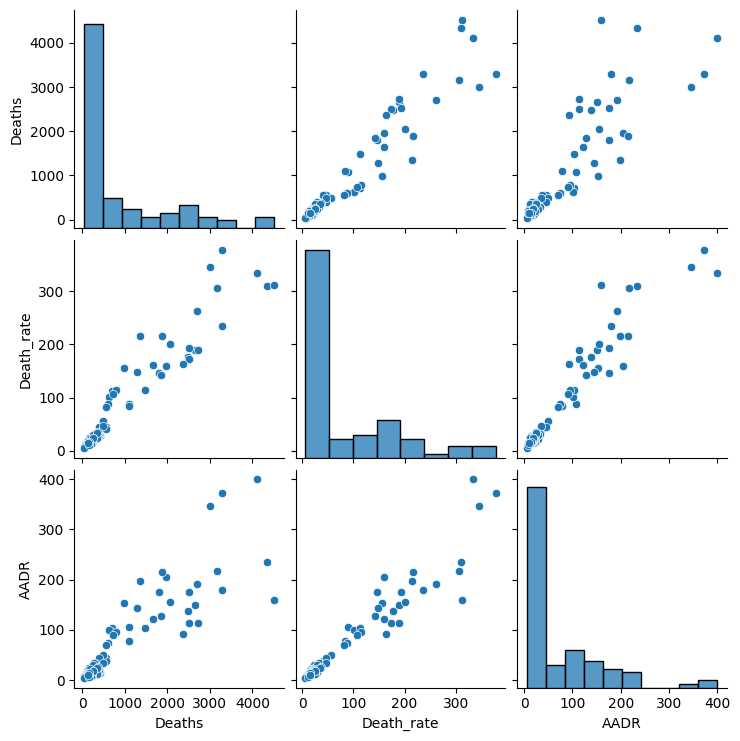

In [178]:
#created a pairplot to visualize relationships for rates and count
sns.pairplot(Data)
plt.show()



In [ ]:
#Created a correlation matrix for the count and rates
correlation_matrix = Data.corr()
print(correlation_matrix)

              Deaths  Death_rate      AADR
Deaths      1.000000    0.954348  0.878912
Death_rate  0.954348    1.000000  0.958421
AADR        0.878912    0.958421  1.000000


# Conclusions  


Based on the analysis made heart disease the top leading cause of death in 2020 for NYC, although the covid-19 had a higher death rate and age adjusted death rate, covid-19 didn’t cause the max death but it had a surge during a short period of time(pandemic). Surprisingly, covid-19 wasn’t biggest killer during but many people took action to prevent the spread or getting covid yet again heart disease was the number cause of death and there isn’t many advertisements on preventing heart disease, nor prizes were given to those that decreased their sodium intake just like those who received the covid vaccine. The information from this data can be useful to try give the public a sense of awareness, it would be great to compare this data with the leading causes from other countries, especially Wuhan, China where covid-19 had first emerged from.